# Exam -  Monday 26, August 2019 - solutions

**Scientific Programming - Data Science @ University of Trento**

## [Download exercises and solution](../../_static/datasciprolab-2019-08-26-exam.zip)

## Introduction

* **Taking part to this exam erases any vote you had before**



### Grading


* **Correct implementations**: Correct implementations with the required complexity grant you full grade.
* **Partial implementations**: Partial implementations _might_ still give you a few points. If you just can't solve an exercise,  try to solve it at least for some subcase (i.e. array of fixed size 2) commenting why you did so. 
* **Bonus point**: One bonus point can be earned by writing stylish code. You got style if you:

    - do not infringe the [Commandments](https://datasciprolab.readthedocs.io/en/latest/commandments.html)
    - write [pythonic code](http://docs.python-guide.org/en/latest/writing/style)
    - avoid convoluted code like i.e.

        ```
        if x > 5:
            return True
        else:
            return False
        ```

        when you could write just

        ```
        return x > 5
        ```       

### Valid code

<div class="alert alert-warning">

**WARNING**: MAKE SURE ALL EXERCISE FILES AT LEAST COMPILE !!! 
10 MINS BEFORE THE END OF THE EXAM I WILL ASK YOU TO DO A FINAL CLEAN UP OF THE CODE 
</div>



<div class="alert alert-warning">

**WARNING**: _ONLY_ IMPLEMENTATIONS OF THE PROVIDED FUNCTION SIGNATURES WILL BE EVALUATED !!!!!!!!! <br/>    

</div>


For example, if you are given to implement: 

```python
    def f(x):
        raise Exception("TODO implement me")
```

and you ship this code:

``` python
def my_f(x):
    # a super fast, correct and stylish implementation

def f(x):
    raise Exception("TODO implement me")
```

We will assess only the latter one `f(x)`, and conclude it doesn't work at all :P   !!!!!!!

**Helper functions**

Still, you are allowed to define any extra helper function you might need. If your `f(x)` implementation calls some other function you defined like `my_f` here, it is ok:

```python
# Not called by f, will get ignored:
def my_g(x):
    # bla

# Called by f, will be graded:
def my_f(y,z):
    # bla

def f(x):
    my_f(x,5)
    

```



### How to edit and run

To edit the files, you can use any editor of your choice,  you can find them under _Applications->Programming_:

* **Visual Studio Code**
* Editra is easy to use, you can find it under _Applications->Programming->Editra_.
* Others could be _GEdit_ (simpler), or _PyCharm_ (more complex).

To run the tests, use **the Terminal** which can be found in _Accessories -> Terminal_ 



<div class="alert alert-info">

**IMPORTANT**: Pay close attention to the comments of the functions.
</div>

<div class="alert alert-warning">

**WARNING**: _DON'T_ modify function signatures! Just provide the implementation.
</div>

<div class="alert alert-warning">

**WARNING**: <i>DON'T</i> change the existing test methods, just add new ones !!!  You can add as many as you want.
</div>

<div class="alert alert-warning">

**WARNING**: _DON'T_ create other files. If you still do it, they won't be evaluated.
</div>




### Debugging 

If you need to print some debugging information, you are allowed to put extra <code>print</code>
    statements in the function bodies.


<div class="alert alert-warning">

**WARNING:** even if print statements are allowed, be careful with prints that might
     break your function! 
</div>


For example, avoid stuff like this: 

```python
x = 0
print(1/x)
```


### What to do

1) Download  `datasciprolab-2019-08-26-exam.zip` and extract it <b>on your desktop</b>. Folder content should be like this:

```
datasciprolab-2019-08-26-FIRSTNAME-LASTNAME-ID
    |-jupman.py
    |-sciprog.py
    |-exams
        |-2019-08-26
            |- exam-2019-08-26-exercise.ipynb          
            |- theory.txt
            |- backpack_exercise.py
            |- backpack_test.py
            |- concert_exercise.py
            |- concert_test.py
            
            
```

2) Rename `datasciprolab-2019-08-26-FIRSTNAME-LASTNAME-ID` folder: put your name, lastname an id number, like `datasciprolab-2019-08-26-john-doe-432432`

From now on, you will be editing the files in that folder. At the end of the exam, that is what will be evaluated.

3) Edit the files following the instructions in this worksheet for each exercise. Every exercise should take max 25 mins. If it takes longer, leave it and try another exercise.

4) When done:

- if you have unitn login:  zip and send to [examina.icts.unitn.it/studente](http://examina.icts.unitn.it/studente)
  
- If you don't have unitn login: tell instructors and we will download your work manually
 


## Part A

Open Jupyter and start editing this notebook `exam-2019-08-26-exercise.ipynb`


You will work on the dataset of _University of Trento staff_, modified so not to contain names or surnames.

Data provider: [University of Trento](https://dati.trentino.it/dataset/personale-accademico-e-tecnico-amministrativo-dell-universita-di-trento)

A function `load_data` is given to load the dataset (you don’t need to implement it):

In [1]:
import json

def load_data():
    with open('data/2019-06-30-persone-en-stripped.json', encoding='utf-8') as json_file:
        data = json.load(json_file)
        return data

unitn = load_data()

<div class="alert alert-warning">

**IMPORTANT**: look at the dataset !

Here we show only first 2 rows, but to get a clear picture of the dataset you should explore it further.

</div>


The dataset contains a list of employees, each of whom may have one or more positions, in one or more university units. Each unit is identified by a code like ``STO0000435``:

In [2]:
unitn[:2]

[{'familyName': 'SURNAME-1',
  'givenName': 'NAME-1',
  'identifier': 'eb9139509dc40d199b6864399b7e805c',
  'phone': ['0461 283752'],
  'positions': [{'role': 'Staff',
    'unitIdentifier': 'STO0008929',
    'unitName': 'Student Support Service: Economics, Law and International Studies'}]},
 {'familyName': 'SURNAME-2',
  'givenName': 'NAME-2',
  'identifier': 'b6292ffe77167b31e856d2984544e45b',
  'phone': ['0461 281521'],
  'positions': [{'role': 'Associate professor',
    'unitIdentifier': 'STO0000435',
    'unitName': 'Doctoral programme – Physics'},
   {'role': 'Deputy coordinator',
    'unitIdentifier': 'STO0000435',
    'unitName': 'Doctoral programme – Physics'},
   {'role': 'Associate professor',
    'unitIdentifier': 'STO0008627',
    'unitName': 'Department of Physics'}]}]

Department names can be very long, so when you need to display them you can use the function this `abbreviate`. 

**NOTE**: function is already fully implemented, do _not_ modify it.

In [3]:
def abbreviate(unitName):
    
    abbreviations = {
         
        "Department of Psychology and Cognitive Science": "COGSCI",    
        "Center for Mind/Brain Sciences - CIMeC":"CIMeC",
        "Department of Civil, Environmental and Mechanical Engineering":"DICAM",    
        "Centre Agriculture Food Environment - C3A":"C3A",
        "School of International Studies - SIS":"SIS",
        "Department of Sociology and social research": "Sociology",
        "Faculty of Law": "Law",
        "Department of Economics and Management": "Economics",
        "Department of Information Engineering and Computer Science":"DISI",
        "Department of Cellular, Computational and Integrative Biology - CIBIO":"CIBIO",
        "Department of Industrial Engineering":"DII"
    }
    if unitName in abbreviations:
        return abbreviations[unitName]
    else:
        return unitName.replace("Department of ", "")


**Example:**

In [4]:
abbreviate("Department of Information Engineering and Computer Science")

'DISI'

### A1 calc_uid_to_abbr

✪ It will be useful having a map from department ids to their abbreviations, if they are actually present, otherwise to their original name. To implement this, you can use the previously defined function `abbreviate`.

```python
{
 .
 .
 'STO0008629': 'DISI',
 'STO0008630': 'Sociology',
 'STO0008631': 'COGSCI',
 .
 .
 'STO0012897': 'Institutional Relations and Strategic Documents',
 .
 .
}
```



In [5]:
def calc_uid_to_abbr(db):
    #jupman-raise
    ret = {}
    for person in db:
        for position in person['positions']:
            uid = position['unitIdentifier']        
            ret[uid] = abbreviate(position['unitName'])
    return ret
    #/jupman-raise

#calc_uid_to_abbr(unitn)
print(calc_uid_to_abbr(unitn)['STO0008629'])
print(calc_uid_to_abbr(unitn)['STO0012897'])

DISI
Institutional Relations and Strategic Documents


### A2.1 calc_prof_roles

✪✪ For each department, we want to see how many professor roles are covered, sorting them from greatest to lowest. In returned list we will only put the 10 department with most roles.

* **NOTE 1**: we are interested in _roles_ covered. Don't care if actual people might be less (one person can cover more professor roles within the same unit)
* **NOTE 2**: there are several professor roles. Please avoid listing all roles in the code ("Senior Professor', "Visiting Professor", ....), and prefer using some smarter way to match them. 


In [6]:
def calc_prof_roles(db):
    #jupman-raise
    hist = {}
    uid_to_abbr = calc_uid_to_abbr(db)
    
    for person in db:
        for position in person['positions']:
            
            role = position['role']
            uid = position['unitIdentifier']
            if 'professor'.lower() in role.lower():                            
                if uid in hist:
                    hist[uid] += 1
                else:
                    hist[uid] = 1
    
    ret = [(uid_to_abbr[x[0]],x[1]) for x in hist.items()]
    ret.sort(key=lambda c: c[1], reverse=True)    
    return ret[:10]
    #/jupman-raise
    
#calc_prof_roles(unitn)

In [7]:
# EXPECTED RESULT
calc_prof_roles(unitn)

[('Humanities', 92),
 ('DICAM', 85),
 ('Law', 84),
 ('Economics', 83),
 ('Sociology', 66),
 ('COGSCI', 61),
 ('Physics', 60),
 ('DISI', 55),
 ('DII', 49),
 ('Mathematics', 47)]

### A2.2 plot_profs

✪ Write a funciton to plot a bar chart of data calculated above

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt


def plot_profs(db):
    #jupman-raise
    
    
    prof_roles = calc_prof_roles(db)
        
    xs = list(range(len(prof_roles)))
    xticks = [p[0] for p in prof_roles]
    ys = [p[1] for p in prof_roles]
    
    fig = plt.figure(figsize=(20,3))

    plt.bar(xs, ys, 0.5, align='center')

    plt.title("Professor roles per department SOLUTION")
    plt.xticks(xs, xticks)

    plt.xlabel('departments')
    plt.ylabel('professor roles')

    plt.show()
    #/jupman-raise

#plot_profs(unitn)

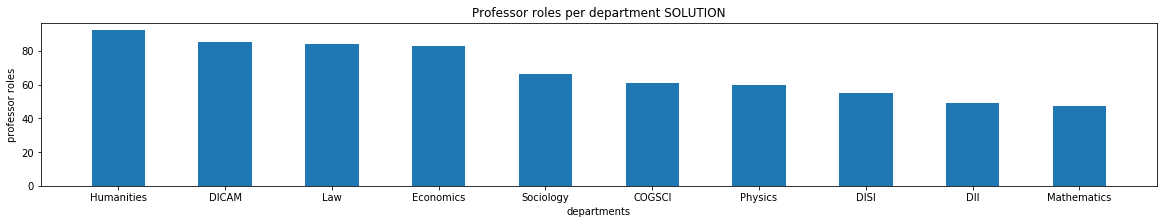

In [9]:
# EXPECTED RESULT
plot_profs(unitn)

### A3.1 calc_roles

✪✪ We want to calculate how many roles are covered for each department.

You will group roles by these macro groups (some already exist, some are new):

- Professor : "Senior Professor', "Visiting Professor", ...
- Research : "Senior researcher", "Research collaborator", ...
- Teaching : "Teaching assistant", "Teaching fellow", ...
- Guest : "Guest", ...

and discard all the others (there are many, like "Rector", "Head", etc ..)

**NOTE**: Please avoid listing all roles in the code ("Senior researcher", "Research collaborator", ...), and prefer using some smarter way to match them. 


In [10]:

def calc_roles(db):
    #jupman-raise
    ret = {}
    for person in db:
        for position in person['positions']:
            uid = position['unitIdentifier']
            role = position['role']
            grouped_role = None
            if "professor" in role.lower():
                grouped_role = 'Professor'
            elif "research" in role.lower():
                grouped_role = 'Research'
            elif "teaching" in role.lower():
                grouped_role = 'Teaching'
            elif "guest" in role.lower():
                grouped_role = 'Guest'

            if grouped_role:
                if uid in ret:
                    if grouped_role in ret[uid]:
                        ret[uid][grouped_role] += 1
                    else:
                        ret[uid][grouped_role] = 1
                else:
                    diz = {}
                    diz[grouped_role] = 1                    
                    ret[uid] = diz
        
    return ret
    #/jupman-raise

#print(calc_roles(unitn)['STO0000001'])
#print(calc_roles(unitn)['STO0000006'])
#print(calc_roles(unitn)['STO0000012'])
#print(calc_roles(unitn)['STO0008629'])

EXPECTED RESULT - Showing just first ones ...

```python
>>> calc_roles(unitn)

{
 'STO0000001': {'Teaching': 9, 'Research': 3, 'Professor': 12},
 'STO0000006': {'Professor': 1},
 'STO0000012': {'Guest': 3},
 'STO0008629': {'Teaching': 94, 'Research': 71, 'Professor': 55, 'Guest': 38}
 .
 .
 .
}
```

### A3.2 plot_roles

✪✪ Implement a function `plot_roles` that given, the abbreviations (or long names) of some departments, plots pie charts of their grouped role distribution, all in one row.

* **NOTE 1**: different plots MUST show equal groups with equal colors
* **NOTE 2**: always show all the 4 macro groups defined before, even if they have zero frequency


* For on example on how to plot the pie charts, [see this](https://datasciprolab.readthedocs.io/en/latest/exercises/visualization/visualization-solution.html#Pie-chart)
* For on example on plotting side by side, [see this](https://datasciprolab.readthedocs.io/en/latest/exercises/visualization/visualization-solution.html#Showing-plots-side-by-side)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_roles(db, abbrs):
    #jupman-raise    
    fig = plt.figure(figsize=(15,4))
    uid_to_abbr = calc_uid_to_abbr(db)
    
    for i in range(len(abbrs)):
            
            abbr = abbrs[i]
            roles = calc_roles(db)
            
            uid = None

            for key in uid_to_abbr:
                if uid_to_abbr[key] == abbr:
                    uid = key

            labels = ['Professor', 'Guest', 'Teaching', 'Research']
            fracs = []
            for role in labels:
                if role in roles[uid]:
                    fracs.append(roles[uid][role])
                else:
                    fracs.append(0)

            plt.subplot(1,            # rows
                        len(abbrs),   # columns
                        i+1)          # plotting in first cell                
            plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)
            plt.title(abbr )
    #/jupman-raise
    
    
#plot_roles(unitn, ['DISI','Sociology', 'COGSCI'])

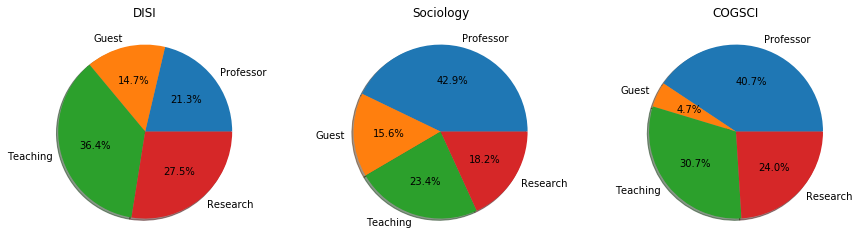

In [12]:
# EXPECTED RESULT
plot_roles(unitn, ['DISI','Sociology', 'COGSCI'])

### A4.1 calc_shared

✪✪✪ We want to calculate the 10 _department pairs_ that have the greatest number of people working in _both_ departments (regardless of role), sorted in decreasing order.

For example,  'CIMeC' and 'COGSCI' have 23 people working in both departments, meaning each of these 23 people has at least a position at CIMeC and at least a position at COGSCI.

**NOTE**: in this case we are looking at number of actual people,  _not_ number of roles covered

* we do not want to consider Doctoral programmes
* we do not want to consider 'University of Trento' department (STO0000001)
* if  your calculations display with swapped names  (  ('COGSCI', 'CIMeC', 23) instead of ('CIMeC', 'COGSCI', 23) ) it is not important, as long as they display just once per pair.


To implement this, we provide a sketch:

* build a dict which assigns unit codes to a `set` of _identifiers_ of people that work for that unit
* to add elements to a set, use `.add` method
* to find common employees between two units, use set `.intersection` method (NOTE: it generates a _new_ set)
* to check for all possibile unit couples, you will need a double `for` on a list of departments. To avoid double checking pairs ( so not have both ('CIMeC', 'COGSCI', 23) and ('COGSCI', 'CIMeC', 23) in output), you can think like you are visiting the lower of a matrix (for the sake of the example here we put only 4 departments with random numbers). 

```
           0      1      2      3
         DISI, COGSCI, CIMeC, DICAM
0 DISI    --     --     --    --
1 COGSCI  313    --     --    -- 
2 CIMeC   231    23     --    --
3 DICAM   12     13     123   --
```


In [13]:

def calc_shared(db):
    #jupman-raise
    ret = {}
    uid_to_people = {}
            
    uid_to_abbr = calc_uid_to_abbr(db)

    for person in db:

        for position in person['positions']:
            uid = position['unitIdentifier']        
            if not uid in uid_to_people:
                uid_to_people[uid] = set()            
            uid_to_people[uid].add(person['identifier'])

    uids = list(uid_to_people)

    ret = []
    for x in range(len(uids)):
        uidx = uids[x]
        for y in range(x):
            uidy = uids[y]
            num = len(uid_to_people[uidx].intersection(uid_to_people[uidy]))
            if (num > 0) \
              and ("Doctoral programme" not in uid_to_abbr[uidx]) \
              and ("Doctoral programme" not in uid_to_abbr[uidy]) \
              and (uidx != 'STO0000001') \
              and (uidy != 'STO0000001'):
                ret.append( (uid_to_abbr[uidx], uid_to_abbr[uidy],num) )

    ret.sort(key=lambda c: c[2], reverse=True)
    ret = ret[:10]
    return ret
    #/jupman-raise
    
#calc_shared(unitn)


In [14]:
# EXPECTED RESULT
calc_shared(unitn)

[('CIMeC', 'COGSCI', 23),
 ('C3A', 'DICAM', 14),
 ('SIS', 'Sociology', 7),
 ('Economics', 'DISI', 7),
 ('Law', 'SIS', 6),
 ('SIS', 'Humanities', 5),
 ('Economics', 'Sociology', 5),
 ('Mathematics', 'Physics', 4),
 ('Mathematics', 'DISI', 4),
 ('Economics', 'SIS', 4)]

### A4.2 plot_shared

✪ Plot the above in a bar chart, where on the x axis there are the department pairs and on the y the number of people in common.

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_shared(db):
    #jupman-raise

    uid_to_abbr = calc_uid_to_abbr(db)       

    shared = calc_shared(db)
    xs = range(len(shared))
    
    xticks = [x[0] + "\n" + x[1] for x in shared]

    ys = [x[2] for x in shared]
    
    fig = plt.figure(figsize=(20,3))

    plt.bar(xs, ys, 0.5, align='center')

    plt.title("SOLUTION")
    plt.xticks(xs, xticks)

    plt.xlabel('Department pairs')
    plt.ylabel('common employees')

    plt.show()
    #/jupman-raise

#plot_shared(unitn)

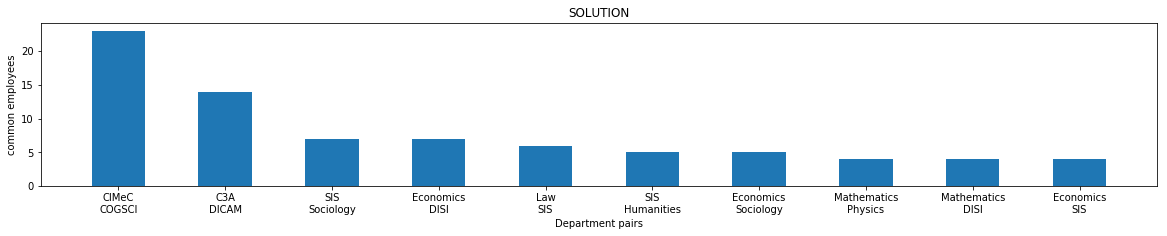

In [16]:
# EXPECTED RESULT

plot_shared(unitn)

## Part B

### B1 Theory

**Write the solution in separate `theory.txt` file**

Let `M` be a square matrix - a list containing n lists, each of them of size `n`. Return the computational complexity of function `fun()` with respect to `n`:

```python
def fun(M):
    for row in M:
        for element in row:
            print(sum([x for x in row if x != element]))
```

**ANSWER**: $O(n^3)$

### B2 Backpack

**Open a text editor** and edit file `backpack_solution.py`

We can model a backpack as stack of elements, each being a tuple with a name and a weight.

A sensible strategy to fill a backpack is to place heaviest elements to the bottom, so our backback will allow pushing an element only if that element weight is equal or lesser than current topmost element weight. 

The backpack has also a maximum weight: you can put any number of items you want, as long as its maximum weight is not exceeded.

**Example**

In [17]:
from backpack_solution import *

bp = Backpack(30)  # max_weight = 30

bp.push('a',10)   # item 'a' with weight 10

DEBUG:  Pushing (a,10)


In [18]:
print(bp)

Backpack: weight=10 max_weight=30
          elements=[('a', 10)]


In [19]:
bp.push('b',8)   

DEBUG:  Pushing (b,8)


In [20]:
print(bp)

Backpack: weight=18 max_weight=30
          elements=[('a', 10), ('b', 8)]


```python
>>> bp.push('c', 11)

DEBUG:  Pushing (c,11)

ValueError: ('Pushing weight greater than top element weight! %s > %s', (11, 8))


```

In [21]:
bp.push('c', 7)

DEBUG:  Pushing (c,7)


In [22]:
print(bp)

Backpack: weight=25 max_weight=30
          elements=[('a', 10), ('b', 8), ('c', 7)]


```python

>>> bp.push('d', 6)  

DEBUG:  Pushing (d,6)

ValueError: Can't exceed max_weight ! (31 > 30)

```

### B2.1 class

✪✪ Implement methods in the class `Backpack`, in the order they are shown. If you want, you can add debug prints by calling the `debug` function

**IMPORTANT: the data structure should provide the total current weight in O(1)**, so make sure to add and update an appropriate field to meet this constraint.

**Testing**: `python3 -m unittest backpack_test.BackpackTest`

### B2.2 remove

✪✪ Implement function `remove`: 

```python
# NOTE: this function is implemented *outside* the class !

def remove(backpack, el):
    """
        Remove topmost occurrence of el found in the backpack, 
        and RETURN it (as a tuple name, weight)
        
        - if el is not found, raises ValueError        

        - DO *NOT* ACCESS DIRECTLY FIELDS OF BACKPACK !!!
          Instead, just call methods of the class!

        - MUST perform in O(n), where n is the backpack size

        - HINT: To remove el, you need to call Backpack.pop() until
                the top element is what you are looking for. You need 
                to save somewhere the popped items except the one to 
                remove, and  then push them back again.
    
    """

```

**Testing**: `python3 -m unittest backpack_test.RemoveTest`


**Example**:


In [23]:
bp = Backpack(50)

bp.push('a',9)
bp.push('b',8)
bp.push('c',8)
bp.push('b',8)
bp.push('d',7)
bp.push('e',5)
bp.push('f',2)        

DEBUG:  Pushing (a,9)
DEBUG:  Pushing (b,8)
DEBUG:  Pushing (c,8)
DEBUG:  Pushing (b,8)
DEBUG:  Pushing (d,7)
DEBUG:  Pushing (e,5)
DEBUG:  Pushing (f,2)


In [24]:
print(bp)

Backpack: weight=47 max_weight=50
          elements=[('a', 9), ('b', 8), ('c', 8), ('b', 8), ('d', 7), ('e', 5), ('f', 2)]


In [25]:
remove(bp, 'b')

DEBUG:  Popping ('f', 2) 
DEBUG:  Popping ('e', 5) 
DEBUG:  Popping ('d', 7) 
DEBUG:  Popping ('b', 8) 
DEBUG:  Pushing (d,7)
DEBUG:  Pushing (e,5)
DEBUG:  Pushing (f,2)


('b', 8)

In [26]:
print(bp)

Backpack: weight=39 max_weight=50
          elements=[('a', 9), ('b', 8), ('c', 8), ('d', 7), ('e', 5), ('f', 2)]


### B.3 Concert

Start editing file `concert_exercise.py`.

When there are events with lots of potential visitors such as concerts, to speed up check-in there are at least two queues: one for cash where tickets are sold, and one for the actual entrance at the event. 

Each visitor may or may not have a ticket. Also, since people usually attend in groups (coupls, families, and so on), in the queue lines each group tends to move as a whole.

In Python, we will model a `Person` as a class you can create like this:


In [27]:
from concert_solution import *

In [28]:
Person('a', 'x', False)

Person(a,x,False)

`a` is the name, `'x'` is the group, and `False` indicates the person doesn't have ticket

To model the two queues, in `Concert` class we have these fields and methods:

```python3 

class Concert:

    def __init__(self):
        self._cash = deque()
        self._entrance = deque()

    
    def enqc(self, person):        
        """ Enqueues at the cash from the right """
        
        self._cash.append(person)
        
    def enqe(self, person):
        """ Enqueues at the entrance from the right """
        
        self._entrance.append(person)
```


### B3.1 dequeue

✪✪✪ Implement `dequeue`.  If you want, you can add debug prints by calling the `debug` function.

```python3
    
    def dequeue(self):
        """ RETURN the names of people admitted to concert  

            Dequeuing for the whole queue system is done in groups, that is, 
            with a _single_ call to dequeue, these steps happen, in order:

            1. entrance queue: all people belonging to the same group at 
               the front of entrance queue who have the ticket exit the queue 
               and are admitted to concert. People in the group without the 
               ticket are sent to cash.
            2. cash queue: all people belonging to the same group at the front 
               of cash queue are given a ticket, and are queued at the entrance queue
        """

```

**Testing**: `python3 -m unittest concert_test.DequeueTest`


**Example**: 

In [29]:
con = Concert()

con.enqc(Person('a','x',False))  # a,b,c belong to same group x
con.enqc(Person('b','x',False))
con.enqc(Person('c','x',False))
con.enqc(Person('d','y',False))  # d belongs to group y
con.enqc(Person('e','z',False))  # e,f belongs to group z
con.enqc(Person('f','z',False))  
con.enqc(Person('g','w',False))  # g belongs to group w


In [30]:
con

Concert: 
      cash: deque([Person(a,x,False),
                   Person(b,x,False),
                   Person(c,x,False),
                   Person(d,y,False),
                   Person(e,z,False),
                   Person(f,z,False),
                   Person(g,w,False)])
  entrance: deque([])

First time we dequeue, entrance queue is empty so no one enters concert, while at the cash queue people in group `x` are given a ticket and enqueued at the entrance queue

**NOTE**: The messages on the console are just debug print, the function `dequeue` only return name sof people  admitted to concert

In [31]:
con.dequeue()

DEBUG:  DEQUEUING ..
DEBUG:  giving ticket to a (group x)
DEBUG:  giving ticket to b (group x)
DEBUG:  giving ticket to c (group x)
DEBUG:  Concert: 
              cash: deque([Person(d,y,False),
                           Person(e,z,False),
                           Person(f,z,False),
                           Person(g,w,False)])
          entrance: deque([Person(a,x,True),
                           Person(b,x,True),
                           Person(c,x,True)])


[]

In [32]:
con.dequeue()

DEBUG:  DEQUEUING ..
DEBUG:  a (group x) admitted to concert
DEBUG:  b (group x) admitted to concert
DEBUG:  c (group x) admitted to concert
DEBUG:  giving ticket to d (group y)
DEBUG:  Concert: 
              cash: deque([Person(e,z,False),
                           Person(f,z,False),
                           Person(g,w,False)])
          entrance: deque([Person(d,y,True)])


['a', 'b', 'c']

In [33]:
con.dequeue()

DEBUG:  DEQUEUING ..
DEBUG:  d (group y) admitted to concert
DEBUG:  giving ticket to e (group z)
DEBUG:  giving ticket to f (group z)
DEBUG:  Concert: 
              cash: deque([Person(g,w,False)])
          entrance: deque([Person(e,z,True),
                           Person(f,z,True)])


['d']

In [34]:
con.dequeue()

DEBUG:  DEQUEUING ..
DEBUG:  e (group z) admitted to concert
DEBUG:  f (group z) admitted to concert
DEBUG:  giving ticket to g (group w)
DEBUG:  Concert: 
              cash: deque([])
          entrance: deque([Person(g,w,True)])


['e', 'f']

In [35]:
con.dequeue()

DEBUG:  DEQUEUING ..
DEBUG:  g (group w) admitted to concert
DEBUG:  Concert: 
              cash: deque([])
          entrance: deque([])


['g']

In [36]:
# calling dequeue on empty lines gives empty list:
con.dequeue()

DEBUG:  DEQUEUING ..
DEBUG:  Concert: 
              cash: deque([])
          entrance: deque([])


[]

#### Special dequeue case: broken group

In the special case when there is a group at the entrance with one or more members without a ticket, it is assumed that the group gets broken, so whoever has the ticket enters and the others get enqueued at the cash.

In [37]:
con = Concert()

con.enqe(Person('a','x',True))  
con.enqe(Person('b','x',False))
con.enqe(Person('c','x',True)) 
con.enqc(Person('f','y',False)) 

con

Concert: 
      cash: deque([Person(f,y,False)])
  entrance: deque([Person(a,x,True),
                   Person(b,x,False),
                   Person(c,x,True)])

In [38]:
con.dequeue()

DEBUG:  DEQUEUING ..
DEBUG:  a (group x) admitted to concert
DEBUG:  b (group x) has no ticket! Sending to cash
DEBUG:  c (group x) admitted to concert
DEBUG:  giving ticket to f (group y)
DEBUG:  Concert: 
              cash: deque([Person(b,x,False)])
          entrance: deque([Person(f,y,True)])


['a', 'c']

In [39]:
con.dequeue()

DEBUG:  DEQUEUING ..
DEBUG:  f (group y) admitted to concert
DEBUG:  giving ticket to b (group x)
DEBUG:  Concert: 
              cash: deque([])
          entrance: deque([Person(b,x,True)])


['f']

In [40]:
con.dequeue()

DEBUG:  DEQUEUING ..
DEBUG:  b (group x) admitted to concert
DEBUG:  Concert: 
              cash: deque([])
          entrance: deque([])


['b']

In [41]:
con

Concert: 
      cash: deque([])
  entrance: deque([])

In [42]:

import sys;
sys.path.append('../../'); 
import jupman;
import backpack_solution
import backpack_test
backpack_solution.DEBUG = False
jupman.run(backpack_test)

import concert_solution
import concert_test
concert_solution.DEBUG = False
jupman.run(concert_test)

..................
----------------------------------------------------------------------
Ran 18 tests in 0.016s

OK
.......
----------------------------------------------------------------------
Ran 7 tests in 0.004s

OK
